# Final Project - Peter Stoermer

### Introduction

- Explain the problem 


For the project I would like to investigate if there is a trend in overall happiness in different countries all around the world. I feel like in an uncertain time like today it is more important than ever for countries to work together to overcome the challenges of unahppiness in order to create a better environment for everyone. I would also like to see if there are different factors that could influence the overall happiness of a country.

- Short explanation of how to solve the problem

To solve the problem I will import the data via a $.csv$ file into the notebook and clean the data to make it easier to work on using the techniques that we have learned throughout the semester. Then I will conduct some exploratory data slciing to find trends in the data and create tables and plots to visualize the trends that I found. By doing this I will create an easy to read and understand comprehensive overview of the data for the end user to use and learn from.

### Data Preparation

In [21]:
# Importing libaries
library(ggplot2)
library(leaflet)
library(cowplot)
library(sf)

Linking to GEOS 3.9.0, GDAL 3.2.1, PROJ 7.2.1


In [4]:
# Importing data set
data <- read.csv('2019.csv')
head(data)


Overall.rank,Country.or.region,Score,GDP.per.capita,Social.support,Healthy.life.expectancy,Freedom.to.make.life.choices,Generosity,Perceptions.of.corruption
1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343


In [5]:
# Data cleaning (checking NA values)
str(data)
print('--------------------------------------------------------------------------------------------------')
sum = sum(is.na(data))
str = "There are these many NA values in the data set: "
result = paste(str, sum)
print(result)

'data.frame':	156 obs. of  9 variables:
 $ Overall.rank                : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Country.or.region           : Factor w/ 156 levels "Afghanistan",..: 44 37 106 58 99 134 133 100 24 7 ...
 $ Score                       : num  7.77 7.6 7.55 7.49 7.49 ...
 $ GDP.per.capita              : num  1.34 1.38 1.49 1.38 1.4 ...
 $ Social.support              : num  1.59 1.57 1.58 1.62 1.52 ...
 $ Healthy.life.expectancy     : num  0.986 0.996 1.028 1.026 0.999 ...
 $ Freedom.to.make.life.choices: num  0.596 0.592 0.603 0.591 0.557 0.572 0.574 0.585 0.584 0.532 ...
 $ Generosity                  : num  0.153 0.252 0.271 0.354 0.322 0.263 0.267 0.33 0.285 0.244 ...
 $ Perceptions.of.corruption   : num  0.393 0.41 0.341 0.118 0.298 0.343 0.373 0.38 0.308 0.226 ...
[1] "--------------------------------------------------------------------------------------------------"
[1] "There are these many NA values in the data set:  0"


In [6]:
# Data cleaning (Renaming columns )
data_1 <-data %>%
    rename(
        rank = Overall.rank,
        region = Country.or.region, # I made this lower case for map visualization
        score = Score,
        GDP_per_capita = GDP.per.capita,
        support = Social.support,
        life_expectancy = Healthy.life.expectancy,
        freedom =  Freedom.to.make.life.choices,
        generosity = Generosity ,
        coruption = Perceptions.of.corruption
    )
head(data_1)

rank,region,score,GDP_per_capita,support,life_expectancy,freedom,generosity,coruption
1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343


In [7]:
# Data clenaing (Dropping rank column, its not needed)
data_final <- select(data_1, -rank)
head(data_final)
tail(data_final)

region,score,GDP_per_capita,support,life_expectancy,freedom,generosity,coruption
Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343


,region,score,GDP_per_capita,support,life_expectancy,freedom,generosity,coruption
151,Yemen,3.380,0.287,1.163,0.463,0.143,0.108,0.077
152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035
156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091


In [8]:
# Summary (using summary())
summary(data_final)

         region        score       GDP_per_capita      support     
 Afghanistan:  1   Min.   :2.853   Min.   :0.0000   Min.   :0.000  
 Albania    :  1   1st Qu.:4.545   1st Qu.:0.6028   1st Qu.:1.056  
 Algeria    :  1   Median :5.380   Median :0.9600   Median :1.272  
 Argentina  :  1   Mean   :5.407   Mean   :0.9051   Mean   :1.209  
 Armenia    :  1   3rd Qu.:6.184   3rd Qu.:1.2325   3rd Qu.:1.452  
 Australia  :  1   Max.   :7.769   Max.   :1.6840   Max.   :1.624  
 (Other)    :150                                                   
 life_expectancy     freedom         generosity       coruption     
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.5477   1st Qu.:0.3080   1st Qu.:0.1087   1st Qu.:0.0470  
 Median :0.7890   Median :0.4170   Median :0.1775   Median :0.0855  
 Mean   :0.7252   Mean   :0.3926   Mean   :0.1848   Mean   :0.1106  
 3rd Qu.:0.8818   3rd Qu.:0.5072   3rd Qu.:0.2482   3rd Qu.:0.1412  
 Max.   :1.1410   Max.   :0.6310   Max.   

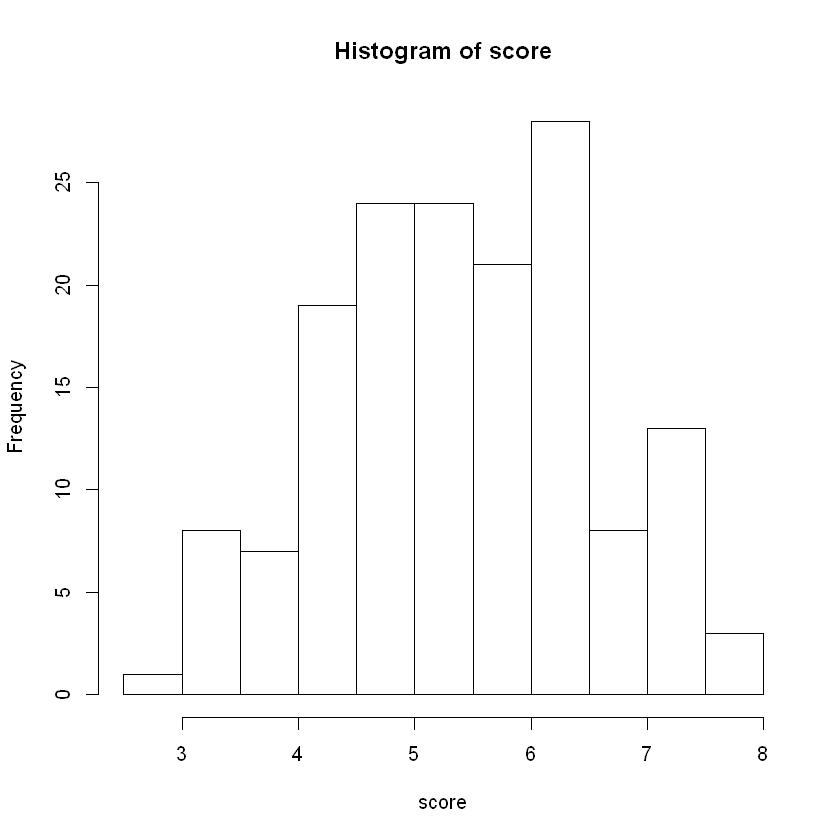

In [9]:
# Plot the distribution of variables using a histogram
score <- data_final$score
hist(score)

### Exploratory Data Analysis

In [10]:
# Adding a new column to find the percent happier of each country compared the least happiest

percent_happy <- data_final %>% mutate(percent_happier = (score/min(score) * 100))
head(percent_happy)
tail(percent_happy)

region,score,GDP_per_capita,support,life_expectancy,freedom,generosity,coruption,percent_happier
Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,272.3098
Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,266.3863
Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,264.7739
Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,262.6709
Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,262.4606
Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343,262.1802


,region,score,GDP_per_capita,support,life_expectancy,freedom,generosity,coruption,percent_happier
151,Yemen,3.380,0.287,1.163,0.463,0.143,0.108,0.077,118.4718
152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411,116.8594
153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147,113.2492
154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025,112.2678
155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035,108.0617
156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091,100.0000


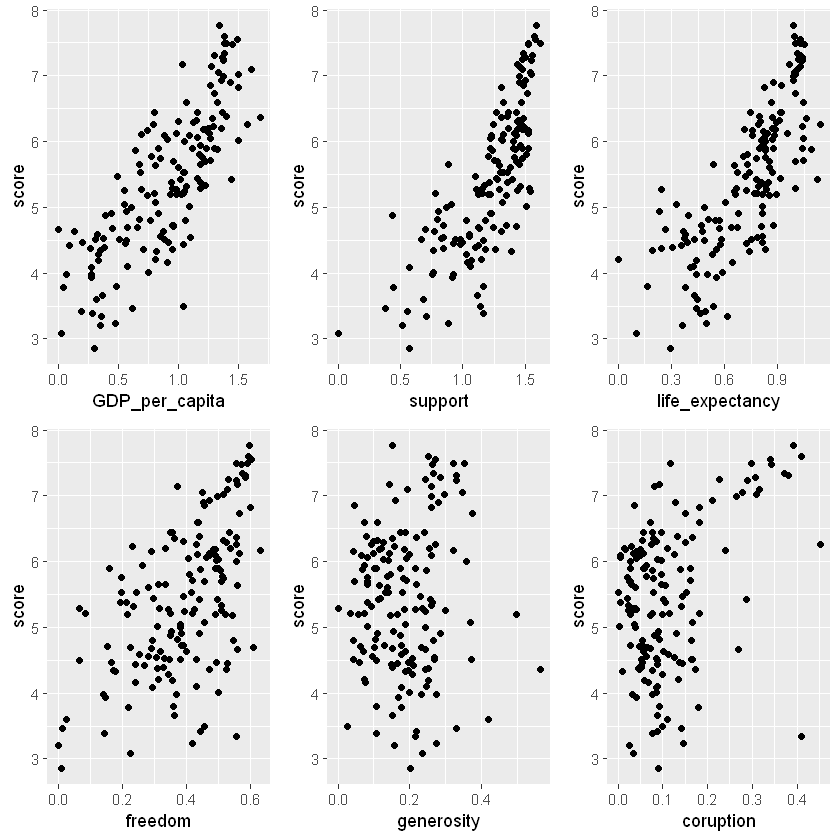

In [11]:
# Provide findings in a plot or a table
p1 <- ggplot(data = data_final, aes(x = GDP_per_capita, y = score)) +
  geom_point()
p2 <-ggplot(data = data_final, aes(x = support, y = score)) +
  geom_point()
p3 <-ggplot(data = data_final, aes(x = life_expectancy, y = score)) +
  geom_point()
p4 <-ggplot(data = data_final, aes(x = freedom, y = score)) +
  geom_point()
p5 <-ggplot(data = data_final, aes(x = generosity, y = score)) +
  geom_point()
p6 <-ggplot(data = data_final, aes(x = coruption, y = score)) +
  geom_point()
plot_grid(p1, p2, p3, p4, p5, p6)

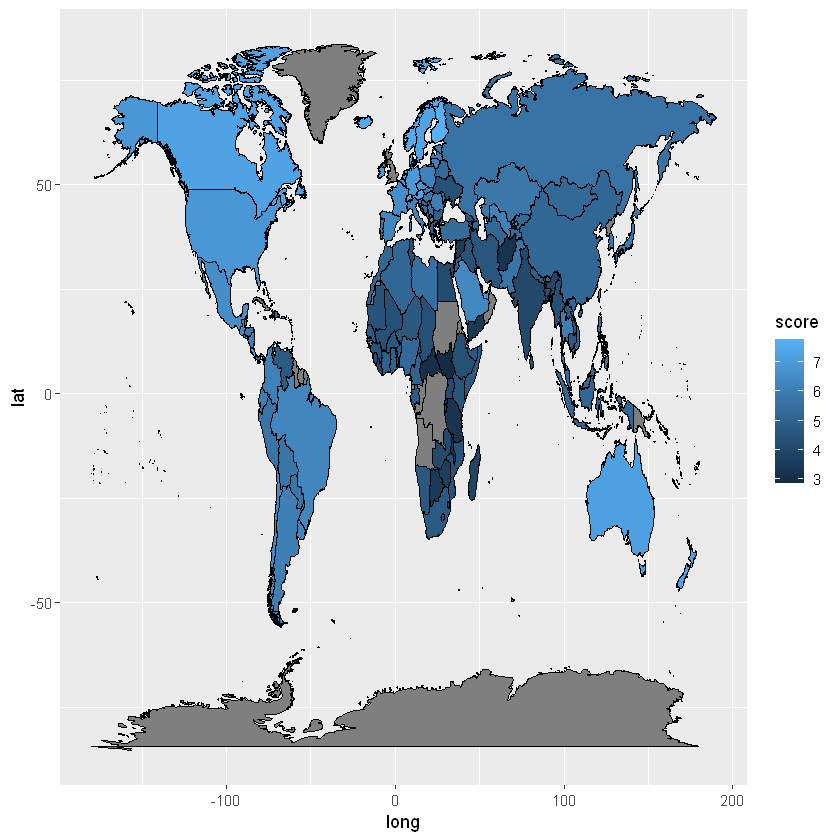

In [55]:
#Attempt to fix the world

mapdata <- map_data("world")
mapdata1 <- mapdata %>%    # Rename columns
  # Replace "United States of America" by USA in the region column
  mutate(
    region = ifelse(region == "USA", "United States", region)
    )     
mapdata_final <- left_join(mapdata1, data_final, by = "region")
map <- ggplot(mapdata_final, aes(x = long, y = lat, group=group)) + geom_polygon(aes(fill = score), color = "black")
map